<a href="https://colab.research.google.com/github/Mikepa22/Projects-IA/blob/main/Clasificaci%C3%B3n_Iris_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias Requeridas

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Analisis Exploratorio de Datos

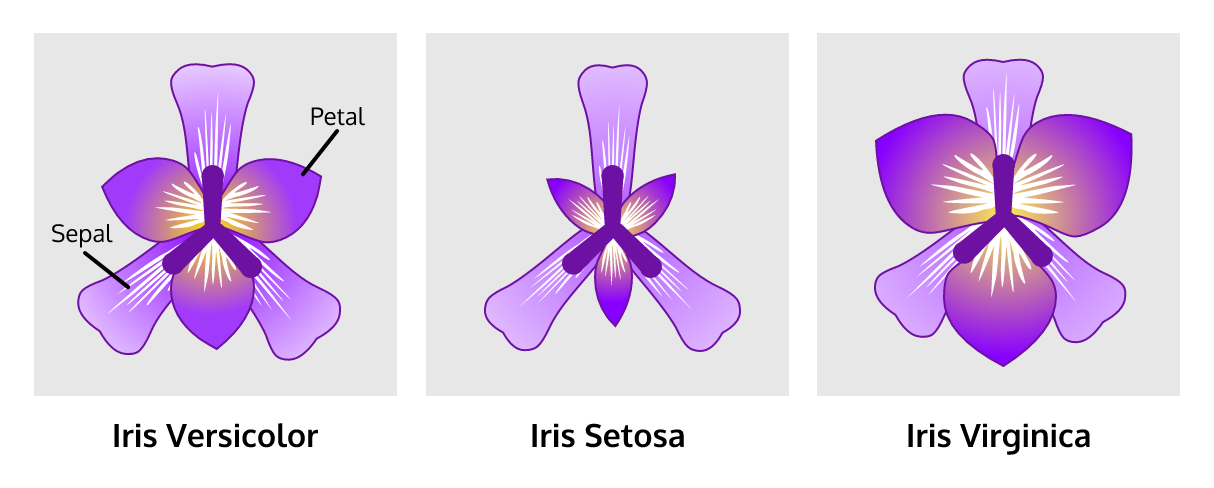

Dataset relacionado a distintas especies de flores iris, donde se tienen en cuenta las siguientes variables estimadoras (X):

* Largo del sépalo en cms
* Ancho del sépalo en cms
* Largo del pétalo en cms
* Ancho del pétalo en cms

Se busca clasificar (Y):

* Especie de iris (0 = Setosa , 1 = Virginica , 2 = Versicolor)




In [ ]:
iris = datasets.load_iris()
features = iris.data
classes = iris.target
iris_df = pd.DataFrame(np.c_[features,classes], columns = ["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"])
iris_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Descripción estadística

In [ ]:
iris_df.describe(include='all')

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


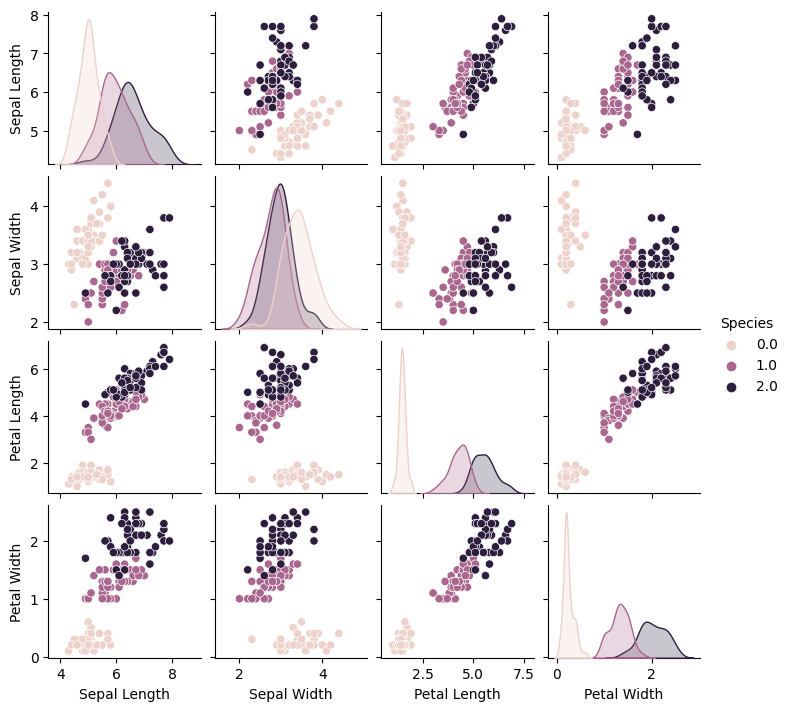

In [ ]:
sns.pairplot(iris_df,hue="Species",height=1.8)
plt.show()

## Análisis de Balanceo de clases

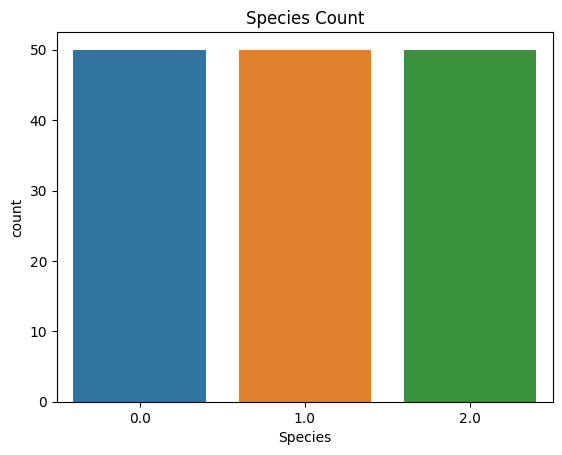

In [ ]:
plt.title('Species Count')
sns.countplot(x = iris_df['Species'])
plt.show()

# Preprocesamiento de Datos

### Determinar caracteristicas y etiquetas
  

In [ ]:
X = iris_df.drop(['Species'], axis=1)
Y = iris_df['Species'].values
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


### Valores Faltantes

In [ ]:
missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('Hay %d columnas con mas del 50%% de valores faltantes' % len(all_missing))

Hay 0 columnas con mas del 50% de valores faltantes


### Remover caracteristicas con cero varianza

In [ ]:
v_thres = VarianceThreshold(threshold=0)
v_thres.fit(X)
Cols = X.columns[v_thres.get_support()]
X = v_thres.transform(X)
X = pd.DataFrame(X,columns=Cols)
X.shape

(150, 4)

### Identificar y eliminar alta colinealidad

Para mejorar la generalización del modelo (trabajando con nuevos datos), en el proceso de selección de características, se eliminan aquellas que presentaban una alta colinealidad con otras

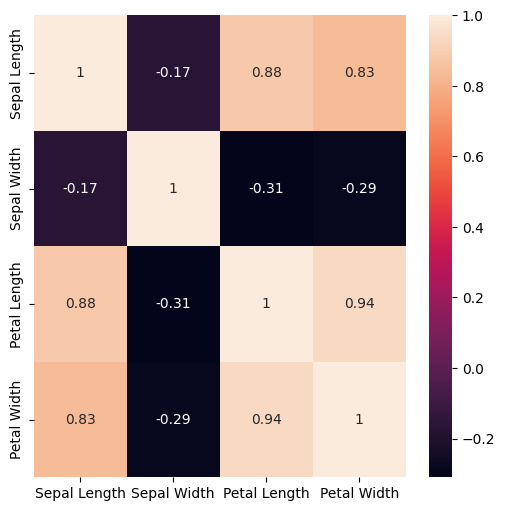

In [ ]:
plt.figure(1, figsize = (6,6))
correlacion = X.corr(method = "spearman")
sns.heatmap(correlacion,annot=True)
plt.show()

In [ ]:
threshold = 0.9
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)
X = X.drop(to_drop, axis=1)
print(X.shape)

There are 1 columns to remove.
['Petal Width']
(150, 3)


##Normalización

In [ ]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

## División del dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print("Training Data:", X_train.shape,y_train.shape)
print("Testing Data:", X_test.shape,y_test.shape)

Training Data: (105, 3) (105,)
Testing Data: (45, 3) (45,)


# Técnicas de ML: Clasificación

Se emplearán métodos de clasificación:

* Regresión Logística


## **Regresión Logística**

In [ ]:
LogReg = LogisticRegression(C=1, max_iter=100, class_weight=None,
                            random_state=16, solver='newton-cg')

In [ ]:
LogReg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=16, solver='newton-cg')

In [ ]:
print("Coeficientes:", LogReg.coef_)
print("\nInterceptos: ", LogReg.intercept_)

Coeficientes: [[-0.59461352  0.80205852 -2.47055743]
 [ 0.57106637 -0.6083467  -0.49844074]
 [ 0.02354715 -0.19371181  2.96899817]]

Interceptos:  [  9.84025195   2.44326844 -12.2835204 ]


### Prueba con datos de entrenamiento

#### Metricas de Clasificación

In [ ]:
y_pred_LogReg = LogReg.predict(X_train)
print(classification_report(y_train, y_pred_LogReg,zero_division=True))

NameError: ignored

#### Matriz de Confusión

In [ ]:
fig,ax = plt.subplots(figsize=(9,4.5),ncols=2,nrows=1)

sns.heatmap(confusion_matrix(y_train, y_pred_LogReg),
            annot=True,ax=ax[0],square=True, cbar=False)
sns.heatmap(confusion_matrix(y_train, y_pred_LogReg,normalize='all'),
            annot=True,ax=ax[1],fmt=".4f",square=True, cbar=False)

ax[0].set(xlabel="Predicted",ylabel="Actual", title="Muestras")
ax[1].set(xlabel="Predicted",ylabel="Actual", title="Normalizado total")
plt.show()

###Prueba con datos de validación

#### Metricas de Clasificación

In [ ]:
y_pred_LogReg_T = LogReg.predict(X_test)
print(classification_report(y_test, y_pred_LogReg_T,zero_division=True))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      0.93      0.90        15
         2.0       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



#### Matriz de Confusión

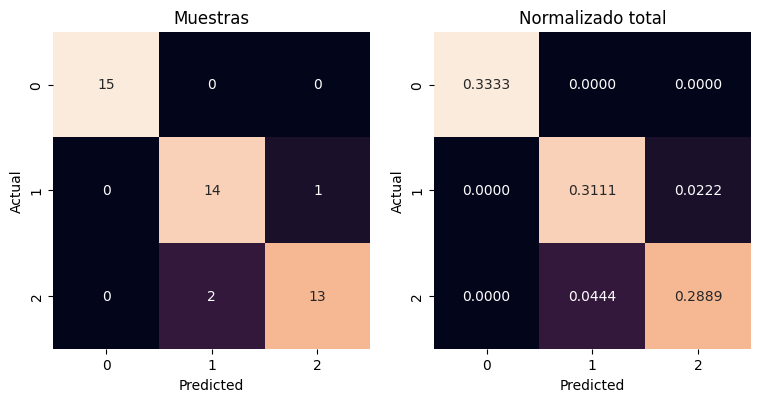

In [ ]:
fig,ax = plt.subplots(figsize=(9,4.5),ncols=2,nrows=1)

sns.heatmap(confusion_matrix(y_test, y_pred_LogReg_T),
            annot=True,ax=ax[0],square=True, cbar=False)
sns.heatmap(confusion_matrix(y_test, y_pred_LogReg_T,normalize='all'),
            annot=True,ax=ax[1],fmt=".4f",square=True, cbar=False)

ax[0].set(xlabel="Predicted",ylabel="Actual", title="Muestras")
ax[1].set(xlabel="Predicted",ylabel="Actual", title="Normalizado total")
plt.show()